Importing dependencies

In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

Loading the Wine dataset

In [2]:
wine_dataset = load_wine()
print(wine_dataset)

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
 

In [3]:
# load wine data to pd dataframe
df = pd.DataFrame(wine_dataset.data, columns=wine_dataset.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
# loading the target to the df
df['target']= wine_dataset.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


Splitting features and target


In [6]:
X = df.drop(columns='target', axis=1)
Y = df['target']
print(X)
print(Y)

     alcohol  malic_acid   ash  ...   hue  od280/od315_of_diluted_wines  proline
0      14.23        1.71  2.43  ...  1.04                          3.92   1065.0
1      13.20        1.78  2.14  ...  1.05                          3.40   1050.0
2      13.16        2.36  2.67  ...  1.03                          3.17   1185.0
3      14.37        1.95  2.50  ...  0.86                          3.45   1480.0
4      13.24        2.59  2.87  ...  1.04                          2.93    735.0
..       ...         ...   ...  ...   ...                           ...      ...
173    13.71        5.65  2.45  ...  0.64                          1.74    740.0
174    13.40        3.91  2.48  ...  0.70                          1.56    750.0
175    13.27        4.28  2.26  ...  0.59                          1.56    835.0
176    13.17        2.59  2.37  ...  0.60                          1.62    840.0
177    14.13        4.10  2.74  ...  0.61                          1.60    560.0

[178 rows x 13 columns]
0  

In [7]:
scalar = StandardScaler()
X = scalar.fit_transform(X)
print(X)


[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


# Grid search cv

In [9]:
model = LogisticRegression()

In [15]:
parameters = { 'penalty': ['l2'],
               'C' : [1,5,10,20],
               'solver': ['liblinear', 'lbfgs']
               }

In [16]:
classifier = GridSearchCV(model,parameters, cv=5)


In [17]:
classifier.fit(X,Y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 5, 10, 20], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [18]:
classifier.cv_results_

{'mean_fit_time': array([0.00363951, 0.0096417 , 0.00401239, 0.00903363, 0.00394516,
        0.00833244, 0.00389442, 0.00836697]),
 'std_fit_time': array([9.86696209e-04, 4.56221422e-03, 3.68787393e-04, 1.06825619e-03,
        9.30772697e-05, 6.99567182e-04, 4.18584812e-05, 1.42117858e-03]),
 'mean_score_time': array([0.00225105, 0.00164256, 0.00176191, 0.00169854, 0.00170479,
        0.00190611, 0.00158358, 0.00170703]),
 'std_score_time': array([1.66545425e-03, 9.77641307e-05, 1.90038423e-04, 4.95643269e-05,
        1.67390939e-04, 3.70929305e-04, 5.32678544e-05, 6.35256271e-05]),
 'param_C': masked_array(data=[1, 1, 5, 5, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=999999),
 'param_penalty': masked_array(data=['l2', 'l2', 'l2', 'l2', 'l2', 'l2', 'l2', 'l2'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'param_solver': mask

In [19]:
classifier.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [20]:
classifier.best_score_

np.float64(0.9888888888888889)

In [21]:
result = pd.DataFrame(classifier.cv_results_)

In [22]:
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003640,0.000987,0.002251,0.001665,1,l2,liblinear,"{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}",0.944444,0.972222,0.972222,1.000000,1.0,0.977778,0.020787,5
1,0.009642,0.004562,0.001643,0.000098,1,l2,lbfgs,"{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}",0.972222,0.972222,1.000000,1.000000,1.0,0.988889,0.013608,1
2,0.004012,0.000369,0.001762,0.000190,5,l2,liblinear,"{'C': 5, 'penalty': 'l2', 'solver': 'liblinear'}",0.972222,0.972222,0.972222,1.000000,1.0,0.983333,0.013608,2
3,0.009034,0.001068,0.001699,0.000050,5,l2,lbfgs,"{'C': 5, 'penalty': 'l2', 'solver': 'lbfgs'}",0.972222,0.972222,0.972222,0.971429,1.0,0.977619,0.011195,6
4,0.003945,0.000093,0.001705,0.000167,10,l2,liblinear,"{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}",0.972222,0.972222,0.972222,1.000000,1.0,0.983333,0.013608,2


In [23]:
result[['param_C','param_penalty','param_solver','mean_test_score']]

,param_C,param_penalty,param_solver,mean_test_score
0,1,l2,liblinear,0.977778
1,1,l2,lbfgs,0.988889
2,5,l2,liblinear,0.983333
3,5,l2,lbfgs,0.977619
4,10,l2,liblinear,0.983333
5,10,l2,lbfgs,0.977619
6,20,l2,liblinear,0.983333
7,20,l2,lbfgs,0.977619


Best tuning parameters:  

*   C = 1     
*   Solver = lbfgs   
*   Penalty = l2





# Randomized Search CV

In [24]:
model = LogisticRegression()

In [25]:
parameters = { 'penalty': ['l2'],
               'C' : [1,5,10,20],
               'solver': ['liblinear', 'lbfgs']
               }

In [26]:
classifier = RandomizedSearchCV(model, parameters, cv=5)

In [27]:
classifier.fit(X,Y)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [1, 5, 10, 20], 'penalty': ['l2'],
                                        'solver': ['liblinear', 'lbfgs']})

In [28]:
classifier.cv_results_

{'mean_fit_time': array([0.00419636, 0.00702267, 0.0034328 , 0.01827722, 0.01005535,
        0.02043509, 0.00470281, 0.01017265]),
 'std_fit_time': array([0.00037209, 0.00033248, 0.00012945, 0.00939343, 0.00138937,
        0.00400361, 0.00147779, 0.00438077]),
 'mean_score_time': array([0.00195475, 0.00159979, 0.00137157, 0.0033886 , 0.00652633,
        0.0025929 , 0.00152588, 0.00171781]),
 'std_score_time': array([3.19620550e-04, 8.37170439e-05, 1.19562617e-04, 2.81639405e-03,
        1.56476029e-03, 1.71975459e-03, 8.55841008e-05, 1.03287926e-04]),
 'param_solver': masked_array(data=['liblinear', 'lbfgs', 'liblinear', 'lbfgs',
                    'liblinear', 'lbfgs', 'liblinear', 'lbfgs'],
              mask=[False, False, False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'param_penalty': masked_array(data=['l2', 'l2', 'l2', 'l2', 'l2', 'l2', 'l2', 'l2'],
              mask=[False, False, False, False, False, False, False, Fals

In [29]:
classifier.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}

In [30]:
classifier.best_score_

np.float64(0.9888888888888889)

In [32]:
results = pd.DataFrame(classifier.cv_results_)

In [33]:
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_penalty,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004196,0.000372,0.001955,0.000320,liblinear,l2,1,"{'solver': 'liblinear', 'penalty': 'l2', 'C': 1}",0.944444,0.972222,0.972222,1.000000,1.0,0.977778,0.020787,5
1,0.007023,0.000332,0.001600,0.000084,lbfgs,l2,1,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 1}",0.972222,0.972222,1.000000,1.000000,1.0,0.988889,0.013608,1
2,0.003433,0.000129,0.001372,0.000120,liblinear,l2,5,"{'solver': 'liblinear', 'penalty': 'l2', 'C': 5}",0.972222,0.972222,0.972222,1.000000,1.0,0.983333,0.013608,2
3,0.018277,0.009393,0.003389,0.002816,lbfgs,l2,5,"{'solver': 'lbfgs', 'penalty': 'l2', 'C': 5}",0.972222,0.972222,0.972222,0.971429,1.0,0.977619,0.011195,6
4,0.010055,0.001389,0.006526,0.001565,liblinear,l2,10,"{'solver': 'liblinear', 'penalty': 'l2', 'C': 10}",0.972222,0.972222,0.972222,1.000000,1.0,0.983333,0.013608,2


In [34]:
results[['param_C','param_solver','param_penalty','mean_test_score']]

,param_C,param_solver,param_penalty,mean_test_score
0,1,liblinear,l2,0.977778
1,1,lbfgs,l2,0.988889
2,5,liblinear,l2,0.983333
3,5,lbfgs,l2,0.977619
4,10,liblinear,l2,0.983333
5,10,lbfgs,l2,0.977619
6,20,liblinear,l2,0.983333
7,20,lbfgs,l2,0.977619


Best tuning parameters:  

*   C = 1     
*   Solver = lbfgs   
*   Penalty = l2





Training the model

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [37]:
model = LogisticRegression(C = 1, penalty='l2', solver='lbfgs')

In [40]:
model.fit(X_train, Y_train)

LogisticRegression(C=1)

Model Evaluation

In [41]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print(' The accuracy score on training data is :', training_data_accuracy)

 The accuracy score on training data is : 1.0


In [42]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print(' The accuracy score on testing data is :', testing_data_accuracy)

 The accuracy score on testing data is : 1.0


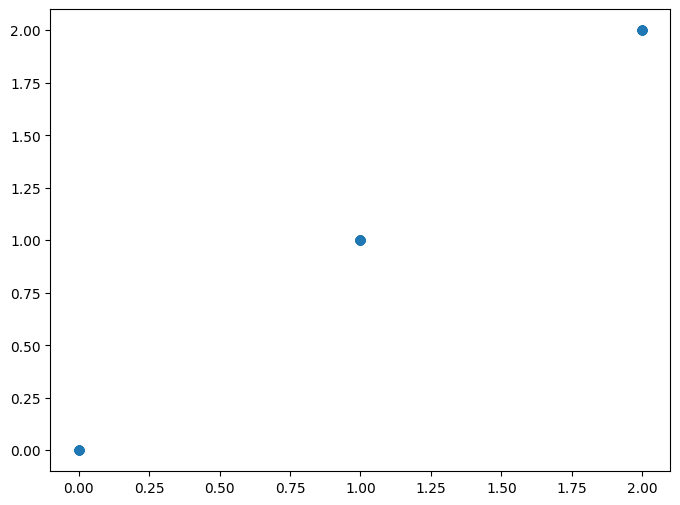

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(X_train_prediction, Y_train)
plt.show()

Model evaluation usiong cross validation

In [52]:
from sklearn.model_selection import cross_val_score

In [53]:
cv_score = cross_val_score(model, X, Y, cv=5)
print('Cross validation score is',cv_score)
print('average cross validation score is', np.mean(cv_score))

Cross validation score is [0.97222222 0.97222222 1.         1.         1.        ]
average cross validation score is 0.9888888888888889


Predictive model

In [59]:
input = (14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.2,5.64,1.04,3.92,1065.0	)

input_as_numpy = np.asarray(input)

input_reshaped = input_as_numpy.reshape(1, -1)

std_input = scalar.fit_transform(input_reshaped)

prediction = model.predict(std_input)

print(prediction)

[1]
